## Import data

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import pandas as pd
import time

2025-03-18 12:12:58.109915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-18 12:12:58.124261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-18 12:12:58.128374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-18 12:12:58.139203: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Original data(already divide into training set & test set) 
    'CRIM',     # 城鎮人均犯罪率
    'ZN',       # 佔地面積超過25,000平方呎的住宅用地比例
    'INDUS',    # 城鎮非零售商業用地比例
    'CHAS',     # 查爾斯河虛擬變量（1表示靠近河邊，0表示不靠近）
    'NOX',      # 一氧化氮濃度（百萬分之一）
    'RM',       # 每棟住宅的平均房間數
    'AGE',      # 1940年以前建造的自住單位比例
    'DIS',      # 與波士頓五個就業中心的加權距離
    'RAD',      # 放射性公路的可達性指數
    'TAX',      # 每10,000美元的全額財產稅率
    'PTRATIO',  # 城鎮學生與教師比例
    'B',        # 1000(Bk - 0.63)^2，其中Bk是城鎮黑人比例
    'LSTAT',    # 人口中社會地位較低的百分比

    Target：
    'MEDV'      # 自有住宅的房價中位數，以千美元為單位。

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(f"Training data:{train_data.shape}")
print(f"Test data:{test_data.shape}")

feature_names = [
    'CRIM',     # 城鎮人均犯罪率
    'ZN',       # 佔地面積超過25,000平方呎的住宅用地比例
    'INDUS',    # 城鎮非零售商業用地比例
    'CHAS',     # 查爾斯河虛擬變量（1表示靠近河邊，0表示不靠近）
    'NOX',      # 一氧化氮濃度（百萬分之一）
    'RM',       # 每棟住宅的平均房間數
    'AGE',      # 1940年以前建造的自住單位比例
    'DIS',      # 與波士頓五個就業中心的加權距離
    'RAD',      # 放射性公路的可達性指數
    'TAX',      # 每10,000美元的全額財產稅率
    'PTRATIO',  # 城鎮學生與教師比例
    'B',        # 1000(Bk - 0.63)^2，其中Bk是城鎮黑人比例
    'LSTAT',    # 人口中社會地位較低的百分比
]

train_df = pd.DataFrame(train_data, columns=feature_names)
print("Training sample:")
for i, name in enumerate(feature_names):
    print(f"{name}: {train_data[0][i]}")

print(f"Targets sample:{train_targets[0]}")

Training data:(404, 13)
Test data:(102, 13)
Training sample:
CRIM: 1.23247
ZN: 0.0
INDUS: 8.14
CHAS: 0.0
NOX: 0.538
RM: 6.142
AGE: 91.7
DIS: 3.9769
RAD: 4.0
TAX: 307.0
PTRATIO: 21.0
B: 396.9
LSTAT: 18.72
Targets sample:15.2


## Feature Normalization
- 對測試資料正規化時，正規化的數值要使用從訓練資料得出來的
- 不能對測試資料做修改

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## optimizer

批次大小batch size: [8, 16, 32, 64, 128]  
世代epoch: [20, 50, 100, 200]

固定參數: 
1. 隱藏層數Dense layer: 5
2. 激活函數Activation function: ReLU
3. 節點數Node: 128
4. 優化器optimizer: adam
5. epoch:200
6. batch size:16

In [4]:
optimizer_list = ['SGD','adam']

results = []

### 建構模型method

In [5]:
def build_model(optimizer):
    start_time = time.time()
    model = keras.Sequential()
    epochs = 200
    batch_size = 16
    model.add(layers.Dense(128, activation='relu'))
    #layers.BatchNormalization(),
    for _ in range(5 - 1):
        model.add(layers.Dense(128, activation='relu'))
        #layers.BatchNormalization(),
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizer, loss="mae", metrics=["mae", "mse", "mape"])
    history = model.fit(train_data, train_targets,epochs=epochs,batch_size=16,validation_split=0.2,verbose=0)
    end_time = time.time()
    execution_time = end_time - start_time
    train_metrics = model.evaluate(train_data, train_targets, verbose=0)
    train_mae = train_metrics[1]
    train_mse = train_metrics[2]
    train_mape = train_metrics[3]
    train_rmse = math.sqrt(train_mse)
    test_metrics = model.evaluate(test_data, test_targets, verbose=0)
    test_mae = test_metrics[1]
    test_mse = test_metrics[2]
    test_mape = test_metrics[3]
    test_rmse = math.sqrt(test_mse)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('MAE')
    plt.ylabel('metrics')
    plt.xlabel('epochs')
    plt.legend(loc='best')
    ax = plt.gca()
    y_scale = MultipleLocator(0.5)
    x_scale = MultipleLocator(50)
    ax.yaxis.set_major_locator(y_scale)
    ax.xaxis.set_major_locator(x_scale)
    plt.ylim(0,8)
    plt.xlim(0,200)
    plt.savefig(f"./optimizer-{optimizer}.jpg")
    plt.show()
    
    return {
        'epochs': epochs,
        'batch_size': batch_size, 
        'execution_time': execution_time,
        'optimizer': optimizer,
        'train_mae': train_mae, 
        'train_rmse': train_rmse, 
        'train_mape': train_mape,
        'test_mae': test_mae, 
        'test_rmse': test_rmse, 
        'test_mape': test_mape
    }

### 訓練模型(所有排列組合)

優化器：SGD


I0000 00:00:1742299980.603455   97801 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742299980.608692   97801 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742299980.608734   97801 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742299980.610141   97801 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742299980.610184   97801 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

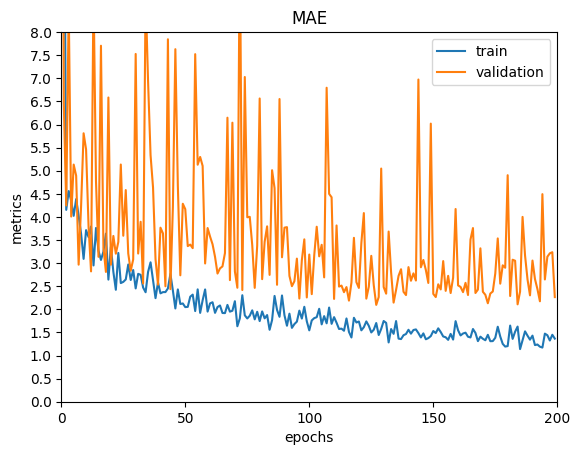

{'epochs': 200, 'batch_size': 16, 'execution_time': 26.625316381454468, 'optimizer': 'SGD', 'train_mae': 1.2697935104370117, 'train_rmse': 1.9297484724165022, 'train_mape': 6.0280256271362305, 'test_mae': 2.692662000656128, 'test_rmse': 3.8661833104753005, 'test_mape': 13.025432586669922}
優化器：adam


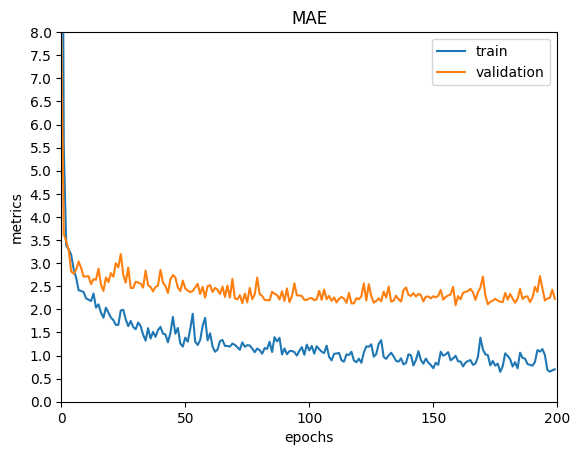

{'epochs': 200, 'batch_size': 16, 'execution_time': 29.223633289337158, 'optimizer': 'adam', 'train_mae': 1.2688500881195068, 'train_rmse': 1.813603952891346, 'train_mape': 5.862216949462891, 'test_mae': 2.53428316116333, 'test_rmse': 3.6722719667816346, 'test_mape': 11.777731895446777}


In [6]:
for optimizer in optimizer_list:
    print(f"優化器：{optimizer}")
    result = build_model(optimizer)
    results.append(result)
    print(result)

In [7]:
train_results_df = pd.DataFrame([
    {
        '優化器': r['optimizer'], '世代個數': r['epochs'], '批次大小': r['batch_size'], '執行時間': r['execution_time'], 
        'MAE': r['train_mae'], 'RMSE': r['train_rmse'], 'MAPE': r['train_mape']
    } for r in results
])

test_results_df = pd.DataFrame([
    {
        '優化器': r['optimizer'], '世代個數': r['epochs'], '批次大小': r['batch_size'], '執行時間': r['execution_time'], 
        'MAE': r['test_mae'], 'RMSE': r['test_rmse'], 'MAPE': r['test_mape']
    } for r in results
])

print("\n訓練績效表現:")
print(train_results_df)

print("\n測試績效表現:")
print(test_results_df)


訓練績效表現:
    優化器  世代個數  批次大小       執行時間       MAE      RMSE      MAPE
0   SGD   200    16  26.625316  1.269794  1.929748  6.028026
1  adam   200    16  29.223633  1.268850  1.813604  5.862217

測試績效表現:
    優化器  世代個數  批次大小       執行時間       MAE      RMSE       MAPE
0   SGD   200    16  26.625316  2.692662  3.866183  13.025433
1  adam   200    16  29.223633  2.534283  3.672272  11.777732


### reference
1. boston dataset: https://lib.stat.cmu.edu/datasets/boston
2. Boston Housing Price dataset with Keras(kaggle): https://www.kaggle.com/code/shanekonaung/boston-housing-price-dataset-with-keras